In [1]:
import pandas as pd
ddf = pd.read_csv('synthetic_data_training.csv')
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              2250 non-null   object 
 1   age                 2250 non-null   int64  
 2   bmi                 2027 non-null   float64
 3   systolic_bp         2017 non-null   float64
 4   diastolic_bp        2017 non-null   float64
 5   exercise_frequency  2022 non-null   object 
 6   smoker              2019 non-null   float64
 7   family_history      2018 non-null   float64
 8   diet_quality        2035 non-null   object 
 9   us_state            2250 non-null   object 
 10  shoe_size           2250 non-null   float64
 11  cholesterol_level   2014 non-null   float64
 12  has_disease         2250 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 228.6+ KB


In [2]:
ddf.describe()

,age,bmi,systolic_bp,diastolic_bp,smoker,family_history,shoe_size,cholesterol_level,has_disease
count,2250.000000,2027.000000,2017.000000,2017.000000,2019.000000,2018.000000,2250.000000,2014.000000,2250.000000
mean,48.902222,26.292475,135.116978,89.829366,0.487865,0.497027,9.105546,200.015578,0.498667
std,18.162408,6.107620,33.006839,22.089851,0.499977,0.500115,2.478910,63.743253,0.500109
min,18.000000,-30.416670,-160.014136,-96.640708,0.000000,0.000000,5.000000,-326.500224,0.000000
25%,34.000000,21.803118,109.943572,73.473876,0.000000,0.000000,6.672070,158.891269,0.000000
50%,49.000000,26.081882,133.801704,88.113863,0.000000,0.000000,9.230031,198.108236,0.000000
75%,64.000000,30.413804,158.017161,104.234262,1.000000,1.000000,11.568194,237.002135,1.000000
max,80.000000,57.274114,334.770486,242.160890,1.000000,1.000000,13.000000,730.549039,1.000000


In [3]:
ddf.head(10)

,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level,has_disease
0,Male,53,19.138668,121.898174,61.773357,NaN,1.0,1.0,Poor,NY,12.365815,160.204426,0
1,Female,23,32.498117,154.821812,68.959128,Regularly,1.0,NaN,Average,OH,10.585105,145.484203,0
2,Male,27,33.151563,185.758938,113.805127,Regularly,1.0,0.0,NaN,FL,12.346710,206.106997,1
3,Female,32,37.248601,163.894943,57.066786,Frequently,0.0,1.0,Poor,OH,7.997821,257.131324,1
4,Female,18,26.668744,117.623795,93.728305,NaN,0.0,0.0,Good,NY,11.679335,249.370450,0
5,Female,60,39.948606,153.133595,71.370458,Rarely,0.0,0.0,Average,OH,6.820618,205.938647,1
6,Female,24,30.558878,158.973071,113.505792,Rarely,1.0,1.0,Good,TX,7.479456,57.846459,0
7,Female,24,30.101645,106.879045,83.012612,Never,1.0,NaN,Good,PA,11.291625,141.340469,0
8,Male,44,18.379879,91.679957,NaN,Never,1.0,1.0,Good,FL,11.906755,152.115071,0
9,Female,64,29.107569,170.031673,78.611698,NaN,1.0,1.0,Poor,OH,9.035745,212.470853,1


Imputing categorical columns

In [4]:
impcolumsfre = ['exercise_frequency','smoker','diet_quality','family_history']
impcolumsmean = ['bmi', 'systolic_bp', 'diastolic_bp','cholesterol_level']

# Impute missing values
from sklearn.impute import SimpleImputer

def impute_most_frequent(df, columns):
    imp = SimpleImputer(strategy='most_frequent')
    # Impute missing values in the specified columns with the most frequent value
    df[columns] = imp.fit_transform(df[columns])

    return df.info()

impute_most_frequent(ddf,impcolumsfre)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              2250 non-null   object 
 1   age                 2250 non-null   int64  
 2   bmi                 2027 non-null   float64
 3   systolic_bp         2017 non-null   float64
 4   diastolic_bp        2017 non-null   float64
 5   exercise_frequency  2250 non-null   object 
 6   smoker              2250 non-null   object 
 7   family_history      2250 non-null   object 
 8   diet_quality        2250 non-null   object 
 9   us_state            2250 non-null   object 
 10  shoe_size           2250 non-null   float64
 11  cholesterol_level   2014 non-null   float64
 12  has_disease         2250 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 228.6+ KB


Imputing Numeric columns

In [5]:
def impute_mean(df, columns):
    imp = SimpleImputer(strategy='mean')
    # Impute missing values in the specified columns with the most frequent value
    df[columns] = imp.fit_transform(df[columns])
    return df.info()
##
impute_mean(ddf,impcolumsmean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              2250 non-null   object 
 1   age                 2250 non-null   int64  
 2   bmi                 2250 non-null   float64
 3   systolic_bp         2250 non-null   float64
 4   diastolic_bp        2250 non-null   float64
 5   exercise_frequency  2250 non-null   object 
 6   smoker              2250 non-null   object 
 7   family_history      2250 non-null   object 
 8   diet_quality        2250 non-null   object 
 9   us_state            2250 non-null   object 
 10  shoe_size           2250 non-null   float64
 11  cholesterol_level   2250 non-null   float64
 12  has_disease         2250 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 228.6+ KB


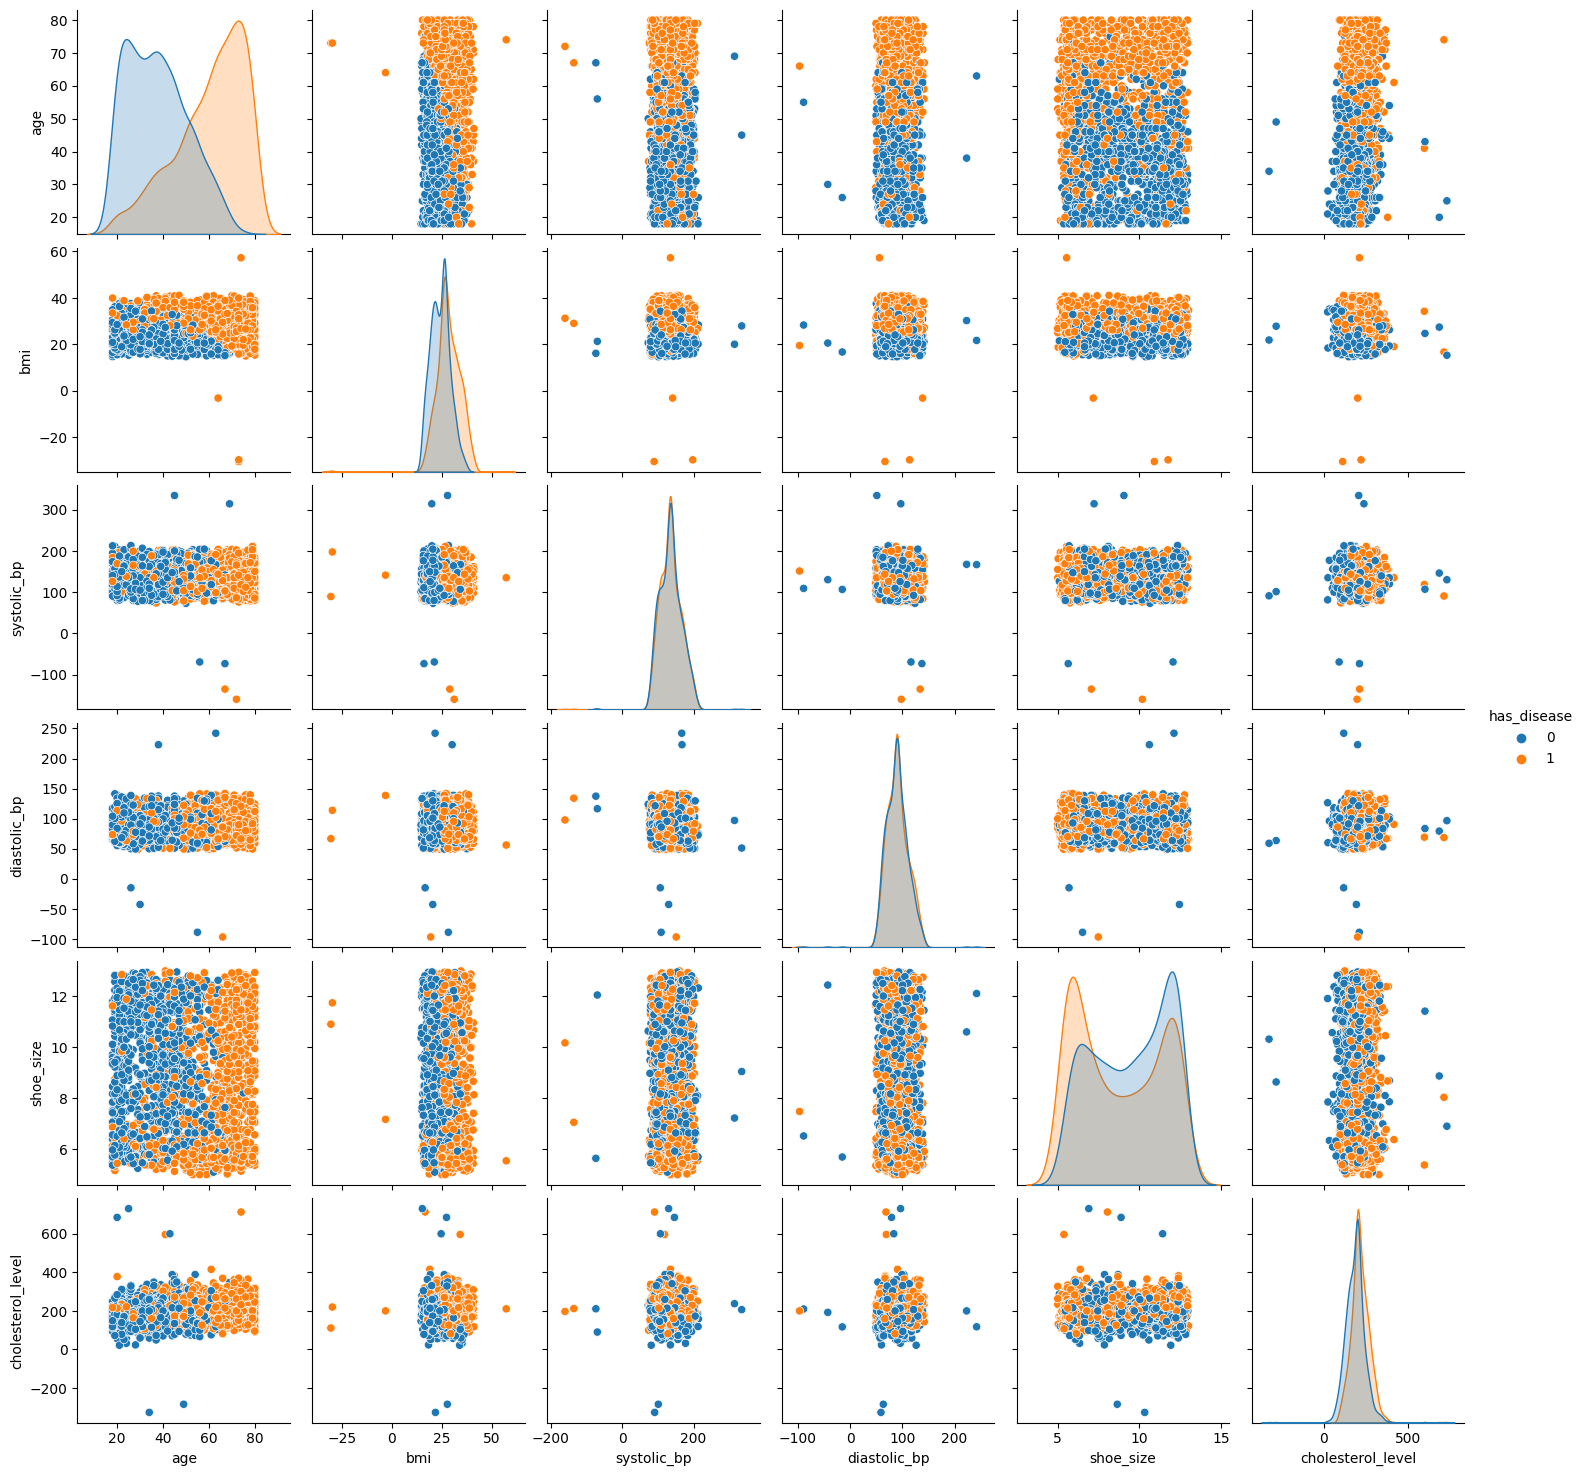

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_num = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level','has_disease']
sns.pairplot(ddf[columns_num], hue='has_disease', diag_kind='kde')
plt.show()

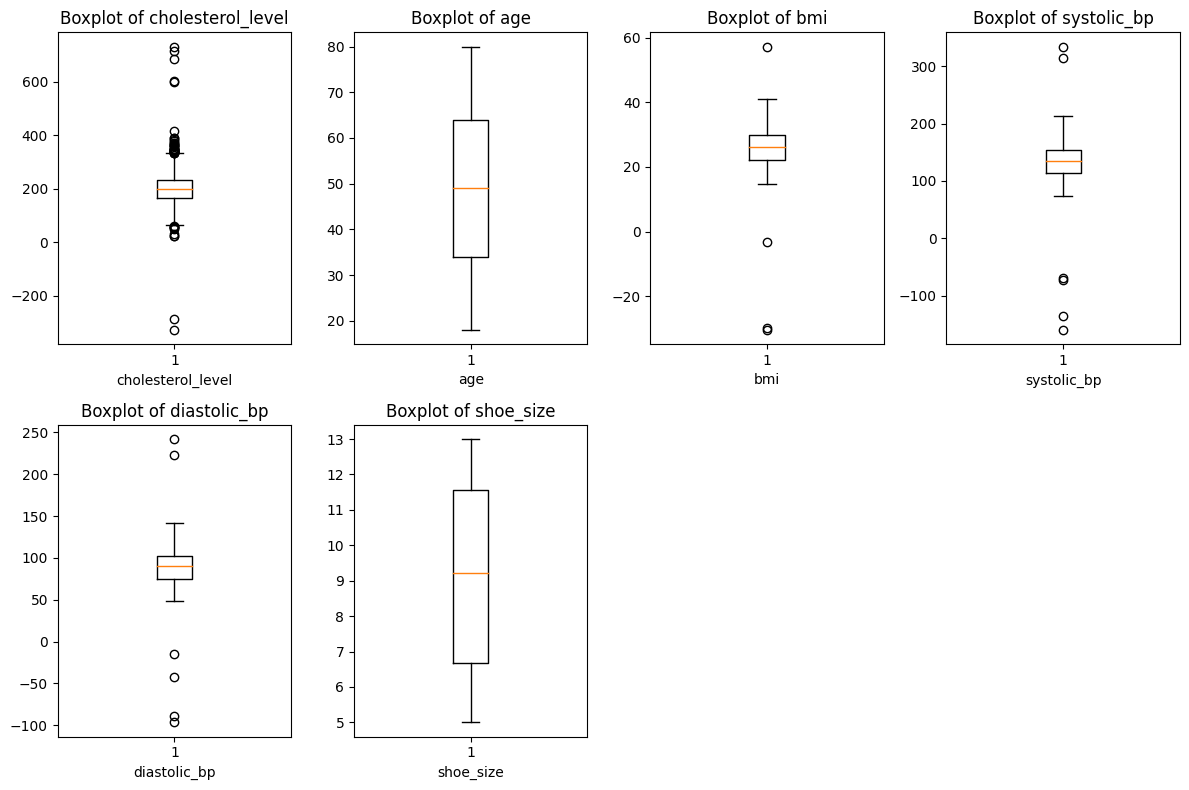

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Create histograms for numeric columns
columnsnumb = ['cholesterol_level','age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size']

# creating function which will create the boxplots for the mentioned columns
def boxplotfun(df,columns_umb):
  plt.figure(figsize=(12, 8))
  for i, col in enumerate(columns_umb, start=1):
      plt.subplot(2, 4, i)
      plt.boxplot(df[col])
      plt.xlabel(col)
      plt.title(f'Boxplot of {col}')

  plt.tight_layout()
  plt.show()
#calling the fucntion
boxplotfun(ddf,columnsnumb)

In [8]:
import pandas as pd
# creating a fucniton which will remove the outliners from the mentioned columns
def remove_outliers(df):

    df_copy = df.copy()
    for col in columnsnumb:
        # Calculate quartiles
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]
    return df_copy

dfout = remove_outliers(ddf)
dfout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2249
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              2187 non-null   object 
 1   age                 2187 non-null   int64  
 2   bmi                 2187 non-null   float64
 3   systolic_bp         2187 non-null   float64
 4   diastolic_bp        2187 non-null   float64
 5   exercise_frequency  2187 non-null   object 
 6   smoker              2187 non-null   object 
 7   family_history      2187 non-null   object 
 8   diet_quality        2187 non-null   object 
 9   us_state            2187 non-null   object 
 10  shoe_size           2187 non-null   float64
 11  cholesterol_level   2187 non-null   float64
 12  has_disease         2187 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 239.2+ KB


In [9]:
# removing the outliners from the cholesterol level by using quartiles values
dfout = dfout[(dfout['cholesterol_level'] >= 120) & (dfout['cholesterol_level'] <= 280)]

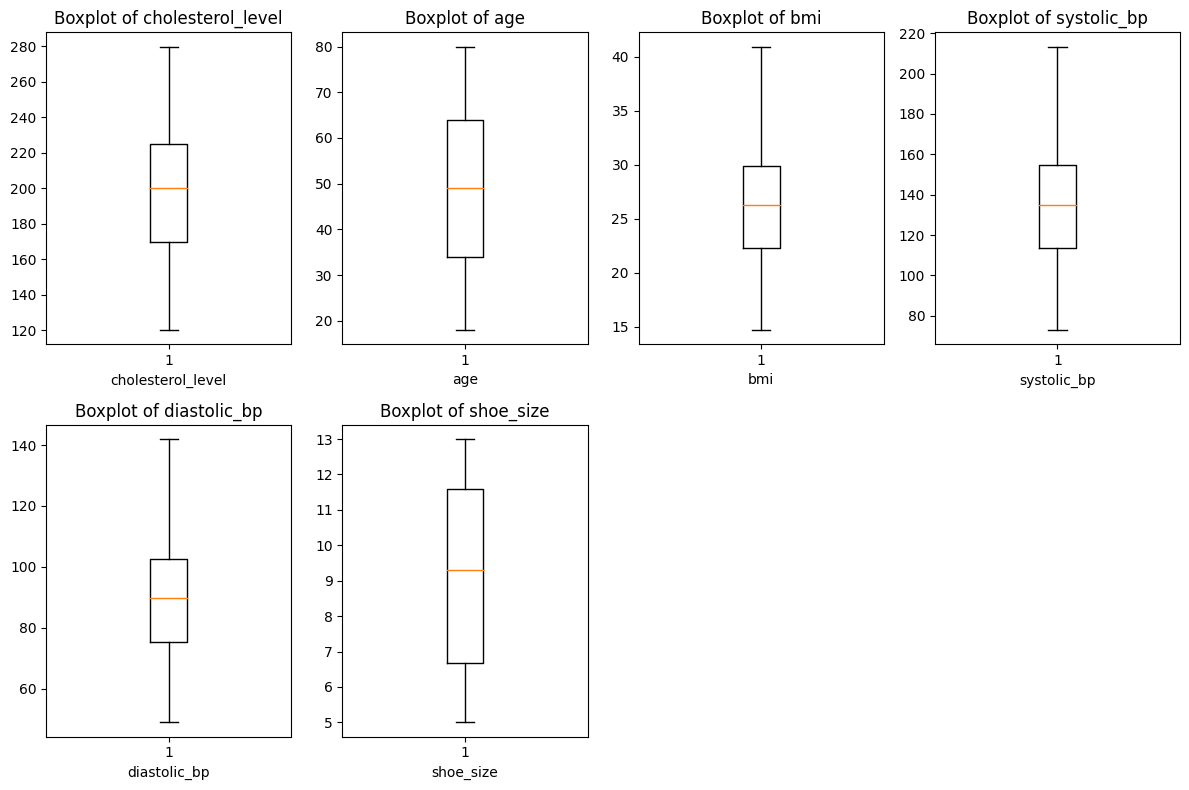

In [10]:
# calling the boxplot function
boxplotfun(dfout,columnsnumb)

In [11]:
dfout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2248
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              1914 non-null   object 
 1   age                 1914 non-null   int64  
 2   bmi                 1914 non-null   float64
 3   systolic_bp         1914 non-null   float64
 4   diastolic_bp        1914 non-null   float64
 5   exercise_frequency  1914 non-null   object 
 6   smoker              1914 non-null   object 
 7   family_history      1914 non-null   object 
 8   diet_quality        1914 non-null   object 
 9   us_state            1914 non-null   object 
 10  shoe_size           1914 non-null   float64
 11  cholesterol_level   1914 non-null   float64
 12  has_disease         1914 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 209.3+ KB


In [12]:
from sklearn.preprocessing import StandardScaler

# Numeric columns to standardize
numeric_cols = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']
scaler = StandardScaler()
dfout[numeric_cols] = scaler.fit_transform(dfout[numeric_cols])


In [13]:
# Categorical columns to one-hot encode
categorical_cols = ['gender', 'exercise_frequency', 'smoker', 'family_history', 'diet_quality', 'us_state']

# One-hot encode categorical features
df = pd.get_dummies(dfout, columns=categorical_cols)


<ipython-input-13-a019f6fbfb37>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(dfout, columns=categorical_cols)
<ipython-input-13-a019f6fbfb37>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(dfout, columns=categorical_cols)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2248
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1914 non-null   float64
 1   bmi                            1914 non-null   float64
 2   systolic_bp                    1914 non-null   float64
 3   diastolic_bp                   1914 non-null   float64
 4   shoe_size                      1914 non-null   float64
 5   cholesterol_level              1914 non-null   float64
 6   has_disease                    1914 non-null   int64  
 7   gender_Female                  1914 non-null   uint8  
 8   gender_Male                    1914 non-null   uint8  
 9   exercise_frequency_Frequently  1914 non-null   uint8  
 10  exercise_frequency_Never       1914 non-null   uint8  
 11  exercise_frequency_Rarely      1914 non-null   uint8  
 12  exercise_frequency_Regularly   1914 non-null   u

# Logistics Regession

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the features (X) and target (y)
X = df.drop('has_disease', axis=1)  # Features
y = df['has_disease']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Logistics Regession Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Logistics Regession Accuracy: 0.8668407310704961
Precision: 0.8078817733990148
Recall: 0.9318181818181818
F1 Score: 0.8654353562005277
Confusion Matrix:
[[168  39]
 [ 12 164]]


# SGDClassifier

In [17]:
# Initialize and train SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)

# Predict using SGDClassifier
y_pred_sgd = sgd_classifier.predict(X_test)

In [18]:
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

# Print the evaluation metrics
print("Accuracy (SGDClassifier):", accuracy_sgd)
print("Precision (SGDClassifier):", precision_sgd)
print("Recall (SGDClassifier):", recall_sgd)
print("F1 Score (SGDClassifier):", f1_sgd)

# Confusion Matrix
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
print("\nConfusion Matrix (SGDClassifier):")
print(conf_matrix_sgd)

Accuracy (SGDClassifier): 0.8511749347258486
Precision (SGDClassifier): 0.8115183246073299
Recall (SGDClassifier): 0.8806818181818182
F1 Score (SGDClassifier): 0.8446866485013624

Confusion Matrix (SGDClassifier):
[[171  36]
 [ 21 155]]


In [19]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)
print("Model Accuracy:", (preds == y_test).sum() / y_test.shape[0])
f1_n = f1_score(y_test, preds)
print("F1 Score (SGDClassifier):", f1_n)

Model Accuracy: 0.8198433420365535


# Test data set

In [ ]:
import pandas as pd
tedf = pd.read_csv('synthetic_data_test.csv')
tedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              750 non-null    object 
 1   age                 750 non-null    int64  
 2   bmi                 674 non-null    float64
 3   systolic_bp         683 non-null    float64
 4   diastolic_bp        683 non-null    float64
 5   exercise_frequency  678 non-null    object 
 6   smoker              681 non-null    float64
 7   family_history      682 non-null    float64
 8   diet_quality        665 non-null    object 
 9   us_state            750 non-null    object 
 10  shoe_size           750 non-null    float64
 11  cholesterol_level   688 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 70.4+ KB


In [ ]:
tedf = tedf[(tedf['cholesterol_level'] >= 120) & (tedf['cholesterol_level'] <= 280)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 749
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              567 non-null    object 
 1   age                 567 non-null    int64  
 2   bmi                 514 non-null    float64
 3   systolic_bp         519 non-null    float64
 4   diastolic_bp        516 non-null    float64
 5   exercise_frequency  567 non-null    object 
 6   smoker              567 non-null    object 
 7   family_history      567 non-null    object 
 8   diet_quality        567 non-null    object 
 9   us_state            567 non-null    object 
 10  shoe_size           567 non-null    float64
 11  cholesterol_level   567 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 57.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 749
Data columns (total 12 columns):
 #   Column              Non-Null Count  

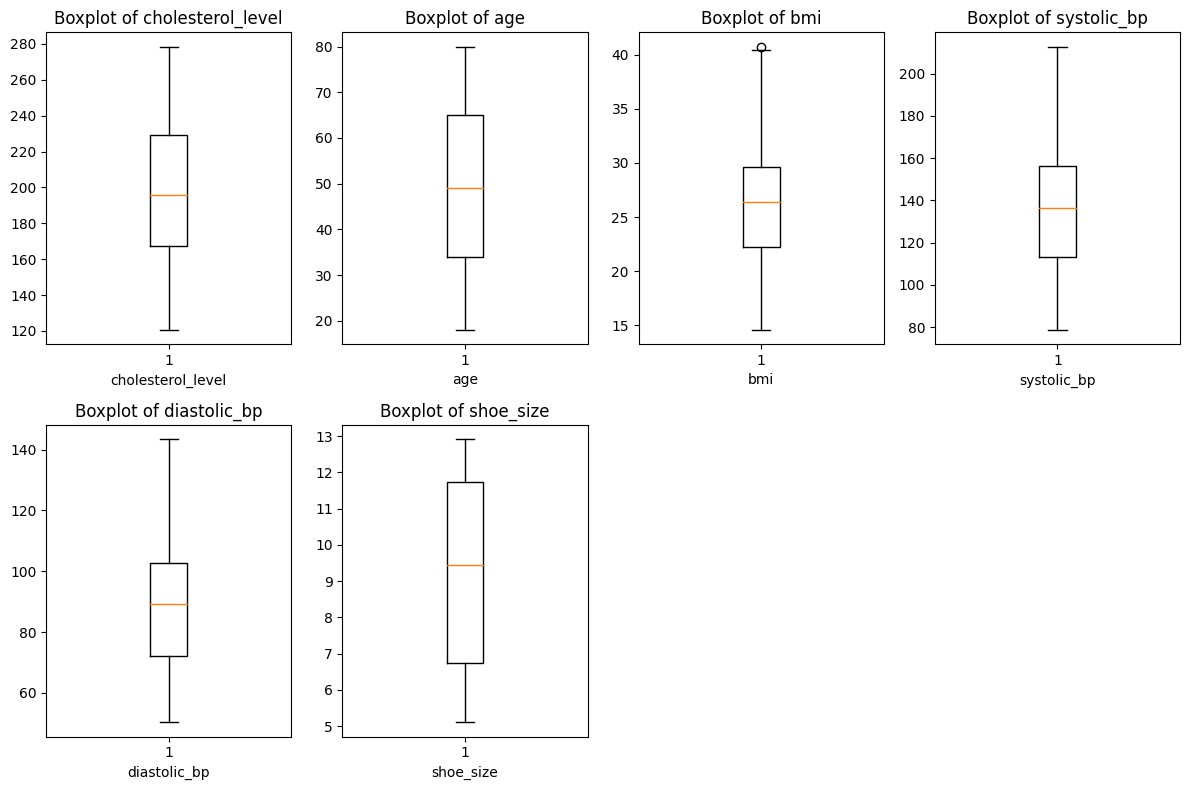

In [ ]:
# calling the functions one by one to clean the dataset and create the boxplot
impute_most_frequent(tedf,impcolumsfre)
impute_mean(tedf,impcolumsmean)
testddf = remove_outliers(tedf)
boxplotfun(testddf,columnsnumb)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Numeric columns to standardize
numeric_cols = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'shoe_size', 'cholesterol_level']
scaler = StandardScaler()
testddf[numeric_cols] = scaler.fit_transform(testddf[numeric_cols])

In [ ]:
# Categorical columns to one-hot encode
categorical_cols = ['gender', 'exercise_frequency', 'smoker', 'family_history', 'diet_quality', 'us_state']

# One-hot encode categorical features
testdf = pd.get_dummies(testddf, columns=categorical_cols)

<ipython-input-189-e7b061291d22>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testdf = pd.get_dummies(testddf, columns=categorical_cols)
<ipython-input-189-e7b061291d22>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  testdf = pd.get_dummies(testddf, columns=categorical_cols)


In [ ]:
# the above trained modesl will be applied the x_test to predict the has_dieases
X_test = testdf  # Features for testing
y_pred_logreg = logreg.predict(X_test)
y_pred_sgd = sgd_classifier.predict(X_test)

In [ ]:
# has_dieases columns
testdf['y_pred_logreg'] = y_pred_logreg
testdf['y_pred_sgd']=y_pred_sgd

In [ ]:
testdf.head()

,age,bmi,systolic_bp,diastolic_bp,shoe_size,cholesterol_level,gender_Female,gender_Male,exercise_frequency_Frequently,exercise_frequency_Never,...,us_state_GA,us_state_IL,us_state_MI,us_state_NC,us_state_NY,us_state_OH,us_state_PA,us_state_TX,y_pred_logreg,y_pred_sgd
0,-1.429201,0.854370,-1.914029,-0.615516,1.440790,0.878041,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.202152,1.772006,1.491903,0.187079,-1.652427,-0.438858,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
3,1.102209,-0.807157,-1.243589,1.221693,-1.434636,1.747108,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1.608490,0.710860,-1.155547,-1.465025,1.022195,1.050971,1,0,1,0,...,0,0,0,1,0,0,0,0,1,1
7,0.989701,-1.082939,0.005605,-0.001111,-1.299820,1.960368,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [ ]:
testdf['y_pred_logreg'].describe()

count    561.000000
mean       0.518717
std        0.500095
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: y_pred_logreg, dtype: float64

In [ ]:
testdf['y_pred_sgd'].describe()

count    561.000000
mean       0.481283
std        0.500095
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: y_pred_sgd, dtype: float64

In [ ]:
testdf.to_csv('answers.csv', index=False)